## Project Portfolio for Advanced Projects in Machine Learning

**Jackson Rudoff**

*Spring 2023*

## Introduction

This document is intended to serve as post-hoc analysis and review of my three projects for the course `QMSS 5074: Advanced Projects in Machine Learning.` Throughout this course, we explored several techniques and approaches, ranging from minimal predictive models built on linear regression to complex convolutional neural networks intended for object detection or video classification. These in-class dicussions were accompanied by three applied projects, in which we were given a dataset with a different classification tasks and model constraints. As part of these projects, we would also submit them to a competition hosted at [ModelShare](https://www.modelshare.ai/), where they would generate predictions on new data and be ranked based on a set evaluation metrics (accuracy, F1, precision, recall). 

Here is a brief summary of these projects and the primary ML library used:

1. World Happiness Data (SKLearn)

    Using the World Happiness dataset and its mixture of numeric and categorical features, predict a given country's happiness category, ranging from `Very Low` to `Very High`. 

2. X-Ray Image Classification (Tensorflow)

    From a large dataset of chest X-Rays, correctly classify an image as belonging to a patient with one of three diagnoses: `Normal`, `COVID`, and `Viral Pneumonia`.

3. SST Classification (Tensorflow)

    Using sequential text data from various move reviews, extract word embeddings and classify a given review as being either `Negative` or `Positive`.


Generally, through some *heavy* experimentation and model-tuning, I was able to build some fairly successful models. In project 2, for example, I was able to build a `CNN` that peaked at 4th on the leaderboard, using a mixture of transfer learning and a heavy stack of Conv2D layers. But throughout this semester, a consistent thread emerged in my work where I discovered the lack of "magic" involved in getting the most out of your models. Aside from general architectural principles - for example, adding more depth to a CNN - there aren't any universal "cure-alls" for a mediocre model. Once you have a good framework, you have to think critically about the issues facing your model, and those issues' specific solutions. You cannot expect a model to magically begin performing better by just throwing more complexity into it, the complexity has to be itself functional.

With this in mind, let's review the models I ran this semester, the data I had to work with, and the lessons I learned from both the sucessess and failures (*especially* the failures) during the experimentation process.

### Project 1: World Happiness Data [(Repo)](https://github.com/jer164/world-happiness-report)

As our first challenge, the World Happiness competition was a relatively straightforward ML-classification problem. We were given a tabular dataset - the World Happiness Dataset, published by the Sustainable Development Solutions Network - and asked to predict a given country's "Happiness", which took one of five possible values: `Very Low`, `Low`, `Average`, `High`, `Very High`. The Happiness scores computed for each country in the dataset were not produced from any one variable in the data, rather built on survey respondents' own assessments of their quality of life. However, the authors of the dataset included several potential numeric covariates and some geographical or political categoricals as part of their own analysis, which estimated the association of these country-level variables with that country's aggregated Happiness score. Our task was to leverage these included covariates and build a conventional machine model to predict a country's Happiness category.


The main challenge with this was feature selection, rather than the actual architecture. Early on, the leaderboard showed that some choice of a `DecisionTreeClassifier`, `RandomForestClassifier`, or a `GradientBoostingClassifier` would be effective even with minimal hyperparameter tuning. What proved more challenging was eliminating noise and redundency in the training features. 

![covariance matrix](images/three_features.png)

As this plot demonstrates, certain variables like `Freedom to Make Life Choices` showed a rather linear positive association with Happiness, but then variables like `Generosity` showed a noisier, quadratic relationship. One of my main priorities then was to reduce the number of features being used for prediction, as this would improve both our generalizability and training time. To accomplish this, I used `SequentialFeatureSelection` to find the 10 features most crucial to pure prediction accuracy. I also incorporated a `GridSearch` with each new architecture, so that I would eventually arrive at the optimal combination of features and parameters ahead of the training process and submission to the leaderboard.

This challenge was a fantastic exercise in the *intentionality* beneath model experimentation and the utility in analyzing the full scope of your tuning metrics when trying to reach maximum prediction accuracy. For example, I actually started off very strong, with a `RandomForest` model that managed to reach #9 on the leaderboard through a combination of a `GridSearch` using the whole dataset and training with the reduced feature set (which I had additionally thought was a mistake!). But throughout the tuning process, I struggled to improve my `GradientBoosting` models, even after discussion with both my teammates and using parameters from the leaderboard. Others were able to get accuracies and F1 scores in the 55-58% range using a `GradientBoosting` architecture, which gave me some tunnel vision with trying to maximize the performance of my own `GradientBoosting` models. I eventually isolated my experimentation to two parameters (learning rate and max depth) based on other top performers, and then plotted the mean test score for different combinations of these two parameters:

![covariance matrix](images/lrate.png)

This exercise was highly informative, as I was able to observe the rapid diminishing returns of `max_depth` for model accuracy. At the same time, though, I learned the hard way that there is so much you can get from a model without including more data. Everyone in the class broadly encountered this issue, where no amount of hyperparameter tuning or feature reduction would bring out greater model accuracy. What would have perhaps helped us here is more data, as we were only working with around ~100 observations from the 2022 dataset. What likely would've helped is acquiring more data from prior years, or maybe adding some additional features that are more related with Happiness outcomes. The general takeaway here was to not get overly-distracted by the tuning process and create a sunk cost fallacy, and that sometimes taking a step back to either expand your training set or experiment further with an architecture *you* have more familiarity with can be more beneficial. 

Below is an overview of the seven best models I submitted, taken from the competition leaderboard. What's worth noting was that my models peaked at around 53% prediction accuracy, but with my hyperparameter optimizations, I was able to attain a higher level of performance across all four metrics using a `GradientBoosting` architecture. 


In [75]:
import pandas as pd

happiness_board = pd.read_csv("data\worldhappiness.csv")

happiness_board[happiness_board['username'] == 'jer2240'].head(7)

,Unnamed: 0,accuracy,f1_score,precision,recall,ml_framework,deep_learning,model_type,depth,num_params,...,relu_act,tanh_act,softmax_act,loss,optimizer,memory_size,team,username,timestamp,version
48,48,0.529412,0.516934,0.635000,0.530000,sklearn,NaN,GradientBoostingClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jer2240,2023-02-07 04:08:33.597615,613
81,81,0.500000,0.493163,0.620000,0.512857,sklearn,NaN,GradientBoostingClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jer2240,2023-02-07 21:38:58.623089,908
92,92,0.529412,0.526775,0.583593,0.541429,sklearn,NaN,GradientBoostingClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jer2240,2023-02-06 04:37:53.607166,446
94,94,0.500000,0.466459,0.656667,0.497857,sklearn,NaN,GradientBoostingClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jer2240,2023-02-07 04:20:19.643108,616
209,209,0.529412,0.507715,0.564444,0.526429,sklearn,NaN,RandomForestClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jer2240,2023-02-05 17:55:46.597415,382
244,244,0.500000,0.479316,0.586508,0.486429,sklearn,NaN,GradientBoostingClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jer2240,2023-02-07 03:35:30.293500,600
341,341,0.470588,0.450271,0.566234,0.495714,sklearn,NaN,RandomForestClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jer2240,2023-02-05 03:59:42.084529,347


### Project 2: X-Ray Classification [(Repo)](https://github.com/jer164/covid-hackathon)

The second competition ("COVID Hackathon") involved the classification of X-Ray data using a convolutional neural network. The data for these models was thousands of high-resolution images of chest X-Rays, each with an attached diagnosis (one of `Normal`, `COVID`, `Viral Pneumonia`). Even from a cursory exploration of the data, the challenge here was immediately obvious. When looking at an example from each category (though I am an untrained observer), it was often not immediately clear what differentiated these images (especially for COVID and viral pneumonia):

![xrays](images/xrayes.png)

In these images, the left image is COVID positive, the middle is normal, and the right is positive for Viral Pneumonia. Believe it or not, these three are among the easier to distinguish in the test set. 

The complexity of this data makes it perfect for a convolutional neural network, and served as my first foray into the Tensorflow library. As a result, there was a bit of learning curve with this classification task for me. I had to both familiarize myself with the techniques involved in this type of model and how to implement these techniques within Tensorflow. From lectures and in-class discussion/experimentation, I learned the importance of convolution to image classification, as it allows you extract a feature map defining the key aspects of an image. Within the context of these X-Rays, convolution layers can extract the main diagnostic features, such as where the chest appears opaque. Additionally, working with filters of different sizes can expand and capture minute details of the X-Ray, locating features that may not otherwise be visible in only one layer of the image or at its base scale. 

Much of my experimentation involved tinkering with the actual structure of the model. Our overview of the history of CNNs covered the most successful architectures from the ImageNet competition, and my main takeaway was that adding depth is unparalleled as a means of improving performance. My initial model was still quite good, as I managed to get 87% accuracy even with a simple structure that had only had a few `Conv1D` layers feeding into `AveragePooling` layers prior to reaching the `Dense` output layer. To try and maximize the model's generalization, I also added `BatchNormalization` after the final `Conv2D` layer to help mitigate overfitting. This became especially important as I increased the number of `epochs`, which extended the training period but would have perhaps overfamiliarized my model with just our training X-Rays. 

What really enabled my model to take off, however, was the incorporation of transfer learning, where pre-trained weights were added into the model architecture ahead of training. With weights from `VGG16` added in, my model managed to achieve 92% prediction accuracy. From here onward, my approach was to work with my teammates to devise strategies improving its generalizability to new data. From analyzing the leaderboard and discussing with my teammates, a few avenues for improvement immediately emerged. I added `L2 Regularization` to my final convolutional layer, and introduced some callbacks like `ReduceOnPlateau` and `Checkpoint` to ensure I was taking advantage of the whole training period. From these further optimizations, I was able to achieve nearly 95% prediction accuracy, which ranked as 4/236 models when it was submitted. 

I considered this model to be a huge success, largely because I felt my experimentation process was streamlined and enabled me to make gradual, well-reasoned improvements at each stage. For example, after seeing how the implementation of greater depth yielded greater performance in both my models and those of others in the competition, I worked with regularization methods to ensure that this depth was geared toward generalization to the competition data. At the same time, I learned a lot about how certain adjustments may not accomplish what you were expecting, and that with greater experimentation/complexity comes more variables to keep track of as you attempt to improve a model. I tinkered with `batch_size` a few times to see if it would allow for increased granularity during the learning process. However, because I adjusted it along with other parameters, it became difficult to trace its actual correlation with improved performance. With the competition over, we can try and extract some information from the leaderboard to see if there is any clear association:


In [29]:
covid_board = pd.read_csv("data\covid-xray.csv")

covid_board_agg = covid_board.groupby("DEPTH")["ACCURACY"].mean().reset_index()

In [71]:
covid_board_agg.sort_values('ACCURACY', ascending=False).head(10)

,DEPTH,ACCURACY
28,36.0,0.932998
30,123.0,0.928737
27,35.0,0.926155
25,30.0,0.924864
20,24.0,0.905112
29,44.0,0.893881
0,4.0,0.830106
26,31.0,0.827421
37,219.0,0.815492
38,220.0,0.805190


There does seem to be a benefit to greater depth, but diminishing returns once you go above the 30s. 

Generally, this project was informative largely because it reinforced the non-magical quality of deep learning. Bringing out the most from your model involves a lot of trial and error, and sometimes you will make improvements for seemingly unclear reasons. But if you can start small and isolate a structure that seems to work well without any fancy tricks or overly-complex tuning methods, this can provide a template for steady improvement as opposed to just blindly guessing what might work based on prior experience. 

Here is an overview of my top 8 models I submitted:

In [72]:
covid_board[covid_board['USERNAME'] == 'jer2240'].head(8)

,ACCURACY,F1_SCORE,PRECISION,RECALL,ML_FRAMEWORK,TRANSFER_LEARNING,DEEP_LEARNING,MODEL_TYPE,DEPTH,NUM_PARAMS,...,SELU_ACT,RELU_ACT,SOFTMAX_ACT,LOSS,OPTIMIZER,MEMORY_SIZE,TEAM,USERNAME,TIMESTAMP,VERSION
7,0.946553,0.946628,0.947665,0.946546,keras,True,True,Sequential,36.0,19406083.0,...,NaN,25.0,1.0,str,Adam,77632408.0,NaN,jer2240,2023-03-12 20:43:58.909531,235
8,0.946553,0.946628,0.947665,0.946546,keras,True,True,Sequential,36.0,19406083.0,...,NaN,25.0,1.0,str,Adam,77632408.0,NaN,jer2240,2023-03-12 20:49:06.829332,236
10,0.940356,0.940215,0.940396,0.940341,keras,True,True,Sequential,36.0,19406083.0,...,NaN,25.0,1.0,str,Adam,77632408.0,NaN,jer2240,2023-03-12 21:19:12.044703,245
17,0.931836,0.931894,0.932181,0.931824,keras,NaN,True,Sequential,35.0,19418371.0,...,NaN,25.0,1.0,str,Adam,77681560.0,NaN,jer2240,2023-03-12 19:15:31.128060,229
26,0.923315,0.923409,0.924350,0.923304,keras,True,True,Sequential,35.0,19418371.0,...,NaN,25.0,1.0,str,Adam,77681560.0,NaN,jer2240,2023-03-12 20:01:20.343767,232
27,0.923315,0.923409,0.924350,0.923304,keras,NaN,True,Sequential,35.0,19418371.0,...,NaN,25.0,1.0,str,Adam,77681560.0,NaN,jer2240,2023-03-12 19:26:56.060937,231
37,0.913246,0.913154,0.913554,0.913225,keras,NaN,True,Sequential,16.0,7179555.0,...,NaN,10.0,1.0,str,Adam,28721448.0,NaN,jer2240,2023-03-10 22:55:16.725207,158
38,0.913246,0.913154,0.913554,0.913225,keras,NaN,True,Sequential,8.0,1794095.0,...,NaN,4.0,1.0,str,Adam,7178376.0,NaN,jer2240,2023-03-10 23:15:50.270514,160


### Project 3: Text Classification with Sequential Data [(Repo)](https://github.com/jer164/sst-competition)


Our final project for the course revolved around classification using sequential data. I think when most of us think of sequential data, we think of music or video, but text is also a sequential data form. The data for this competition took the form of short extracts from movie reviews, and our task was to classify the review into one of two sentiment categories: `positive` or `negative`. A main challenge with this project was to put it in a format suitable for a neural network, as text data does not naturally conform to being a tensor. We have to perform a few transformations to first build out a word index, which allows us to then represent each review as a vector of numbers (with the number corresponding to a word). From here, we can then impute `Embeddings`, which allow us to represent the text data as a vector that's inclusive of the word's semantic information. This is especially useful for a task like this, as it encodes each word with a set of numeric features that provides more context about a word than its pure position in the sequence. 

The basic approach with building out this model was three stages of experimentation: a basic LSTM model, a basic convolutional model, and then a model that uses pre-trained embeddings from GloVe. Compared with the prior project, these models were conceptually a bit more difficult to work with, as the data flow of text --> embeddings --> CNN/RNN made everything a bit complicated at times, particularly when you're somewhat novice to processes beneath neural networks. However, once I had three working models within these frameworks, the tuning process resembled what I had done previously with the CNNs in the COVID competition.

The most effective initial model was a single LSTM layer using the pre-trained GloVe weights; this did make sense, as it allowed access to a large array of embeddings trained on far more complex data. In terms of generalizability, working with these weights was a no-brainer. However, there were some additional tweaks I made based on the findings of my teammates. A major improvement came through the use of `Dropout`, which proved particularly essential for ensuring good generalization with added depth. Taking this approach - stacked `Conv1D` layers with a `Dropout` layer before output - was extremely effective, with my fourth model achieving 81% prediction accuracy and ranking 11/393 at the time of submission. This also appeared to be somewhat of a defining plateau for much of the class, as several of the top performing models stalled in this range (aside from one outlier at 92%):

In [66]:
sent_board = pd.read_csv("data\sstsentiment.csv")
sent_board.head(10)

,Unnamed: 0,accuracy,f1_score,precision,recall,ml_framework,transfer_learning,deep_learning,model_type,depth,...,softmax_act,tanh_act,relu_act,loss,optimizer,memory_size,team,username,timestamp,version
0,0,0.923161,0.923128,0.923962,0.923185,unknown,NaN,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rian,2023-04-13 08:36:38.662069,78
1,1,0.829857,0.829116,0.835855,0.829931,keras,NaN,True,Sequential,6.0,...,1.0,NaN,NaN,str,Adam,14417664.0,NaN,eminilkay,2023-04-14 21:58:42.929609,143
2,2,0.827662,0.827542,0.828508,0.827634,keras,True,True,Sequential,8.0,...,1.0,3.0,2.0,str,RMSprop,3323248.0,NaN,emmayang,2023-04-16 23:21:44.172156,234
3,3,0.825467,0.825058,0.828657,0.825521,keras,NaN,True,Sequential,4.0,...,1.0,1.0,NaN,str,RMSprop,691568.0,NaN,timnyt,2023-04-17 23:39:25.212314,327
4,4,0.825467,0.825425,0.825736,0.825451,keras,NaN,True,Sequential,6.0,...,NaN,2.0,1.0,str,RMSprop,3272592.0,NaN,sdp2158,2023-04-16 00:18:10.097860,195
5,5,0.819978,0.819941,0.820276,0.819995,keras,NaN,True,Sequential,3.0,...,1.0,NaN,NaN,str,RMSprop,445856.0,9.0,realdfy,2023-04-15 21:24:26.415222,184
6,6,0.818880,0.818838,0.819144,0.818864,keras,NaN,True,Sequential,4.0,...,1.0,1.0,NaN,str,RMSprop,749424.0,NaN,timnyt,2023-04-18 04:47:35.461666,385
7,7,0.817783,0.817765,0.817932,0.817794,keras,NaN,True,Sequential,6.0,...,1.0,NaN,2.0,str,Adam,3856424.0,NaN,francesyang,2023-04-12 20:01:33.618443,66
8,8,0.817783,0.817781,0.817789,0.817780,keras,NaN,True,Sequential,3.0,...,NaN,1.0,NaN,function,Adam,8675184.0,NaN,rian,2023-04-13 07:05:50.479257,76
9,9,0.816685,0.816486,0.817983,0.816650,keras,NaN,True,Sequential,5.0,...,1.0,2.0,NaN,str,RMSprop,699936.0,NaN,ran_liao,2023-04-17 00:05:07.190064,237


Because of this rapid success (shared by teammates in their use of a CNN), I decided to move back to my RNN approach to get more experience with tuning this sort of model. However, this proved more difficult than anticipated, as I quickly found that just adding more `LSTM` layers, `Dropout`, and other tactics that had worked previously were not necessarily yielding greater accuracy with unseen data. I think this was where a maximalist approach to model-building really showed its weakness. I added callbacks like `EarlyStop` into the model to try and mitigate the risk of overfitting, as one of my group members had found success with it. In my models, though, I think it conflicted with my other included optimization methods, like `ReduceOnPlateau` and `Dropout`. This experience left me curious to see how LSTMs had broadly performed in the competition:

C:\Users\Jackson\AppData\Local\Temp\ipykernel_304\3847727842.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sent_lstm_agg = sent_board.groupby("lstm_layers")['accuracy', 'f1_score'].mean().reset_index()


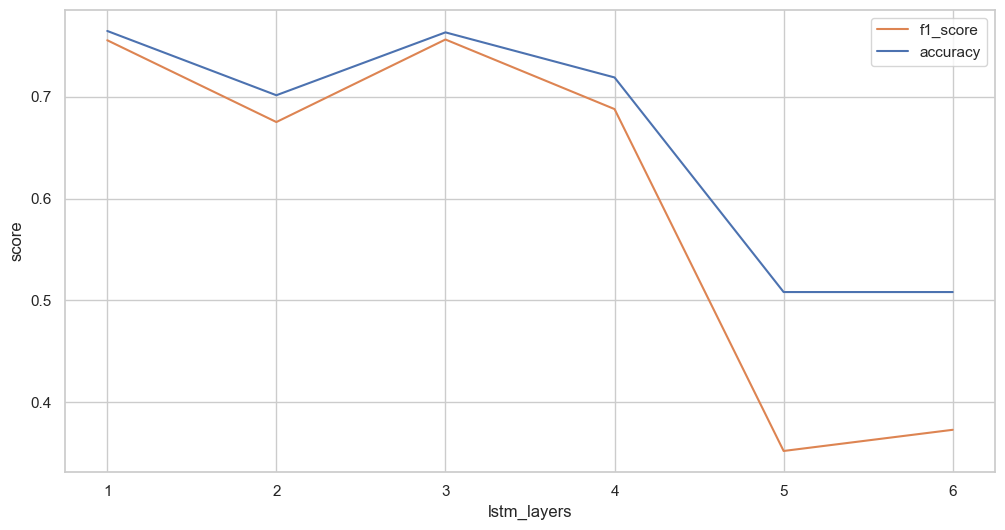

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', rc={'figure.figsize':(12,6)})

sent_lstm_agg = sent_board.groupby("lstm_layers")['accuracy', 'f1_score'].mean().reset_index()
long_sent = pd.melt(sent_lstm_agg, id_vars=['lstm_layers'], var_name='metric', value_name='score')

sns.lineplot(data = long_sent, x = "lstm_layers", y = "score", hue= "metric")
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = list(set(labels))
handles = [handles[labels.index(label)] for label in unique_labels]
plt.legend(handles, unique_labels)

plt.show()


Interestingly, we again see the diminishing returns of adding more depth to a model, this time in the context of an RNN. Of course, we are losing some context for these models and don't know if other parameters are interfering with their performance. I'm also curious to see how the models that incorporated transfer learning fared here:

C:\Users\Jackson\AppData\Local\Temp\ipykernel_304\4264245698.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sent_transfer_agg = sent_board.groupby("transfer_learning")['accuracy', 'f1_score'].mean().reset_index()


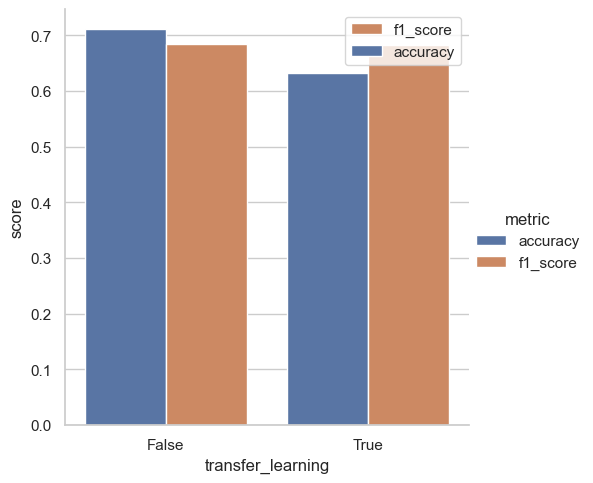

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', rc={'figure.figsize':(12,6)})

sent_board['transfer_learning'] = sent_board["transfer_learning"].fillna(False)
sent_transfer_agg = sent_board.groupby("transfer_learning")['accuracy', 'f1_score'].mean().reset_index()
long_sent_transfer = pd.melt(sent_transfer_agg, id_vars=['transfer_learning'], var_name='metric', value_name='score')

sns.catplot(data = long_sent_transfer, x = "transfer_learning", y = "score", hue= "metric", kind= "bar")
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = list(set(labels))
handles = [handles[labels.index(label)] for label in unique_labels]
plt.legend(handles, unique_labels)

plt.show()

Our models that *did not* use pre-trained weights actually tended to fare better. This definitely defied my expectations, especially as my best LSTM model and the third best model overall used the GloVe embeddings. 

My best performing model, then, was the stacked `Conv1D` model with seven ouput features calculated from the test data. I am definitely interested in revisiting the domain of RNNs to experiment further with different parameters, and perhaps see if I could apply an `LSTM` model with greater success to another classification task.

Below is an overview of my seven best-performing models:

In [74]:
sent_board[sent_board['username'] == 'jer2240'].head(7)

,Unnamed: 0,accuracy,f1_score,precision,recall,ml_framework,transfer_learning,deep_learning,model_type,depth,...,softmax_act,tanh_act,relu_act,loss,optimizer,memory_size,team,username,timestamp,version
11,11,0.814490,0.814457,0.814676,0.814476,keras,False,True,Sequential,15.0,...,1.0,NaN,8.0,str,RMSprop,637376.0,NaN,jer2240,2023-04-18 02:08:08.549804,393
60,60,0.798024,0.797847,0.799148,0.798058,keras,False,True,Sequential,4.0,...,1.0,1.0,NaN,function,RMSprop,4470896.0,NaN,jer2240,2023-04-18 01:50:35.620872,392
61,61,0.795829,0.794581,0.803390,0.795915,keras,False,True,Sequential,4.0,...,1.0,1.0,NaN,str,RMSprop,828272.0,NaN,jer2240,2023-04-11 21:59:20.202453,51
79,79,0.793633,0.792933,0.797806,0.793698,keras,False,True,Sequential,8.0,...,1.0,NaN,4.0,str,RMSprop,612544.0,NaN,jer2240,2023-04-18 00:54:12.859599,386
109,109,0.780461,0.776650,0.801346,0.780605,keras,False,True,Sequential,4.0,...,1.0,1.0,NaN,str,RMSprop,4069232.0,NaN,jer2240,2023-04-18 02:23:42.259191,394
119,119,0.785950,0.785940,0.785985,0.785943,keras,False,True,Sequential,6.0,...,1.0,3.0,NaN,str,RMSprop,4232976.0,NaN,jer2240,2023-04-18 03:05:23.562487,396
142,142,0.780461,0.779924,0.783343,0.780516,keras,False,True,Sequential,4.0,...,1.0,1.0,NaN,str,Adam,478192.0,NaN,jer2240,2023-04-18 00:37:25.382011,383
